In [20]:
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows= 999
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
data = pd.read_csv('Feature_Matrix_16-17.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

<h2> Difference between Vegas Prediction and Results </h2>
Below is the distribution of the difference between the Vegas predictions for point spreads and the actual result from the game. Notice that it is approximately normally distributed with mean of 0.08 and a standard deviation of 12 points. This is the first red flag that this might be a difficult thing to try to beat.

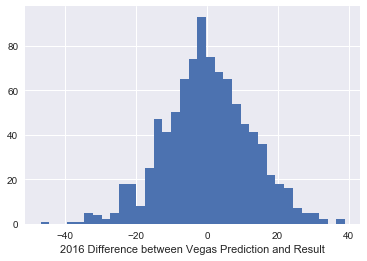

In [69]:
fig = plt.figure()
plt.hist(data['difference'],bins=35)
plt.xlabel('2016 Difference between Vegas Prediction and Result')

In [49]:
print data['difference'].describe()

count    919.000000
mean       0.087051
std       12.301564
min      -47.000000
25%       -7.500000
50%        0.000000
75%        8.500000
max       39.000000
Name: difference, dtype: float64


In [86]:
df = pd.read_csv('history_lines.csv')

In [87]:
df['difference'] = df['Home Closing Line'] -(df['Visitor Score']- df['Home Score'])

In [88]:
df = df.iloc[4:]

In [89]:
df['difference'] = df['difference']*-1

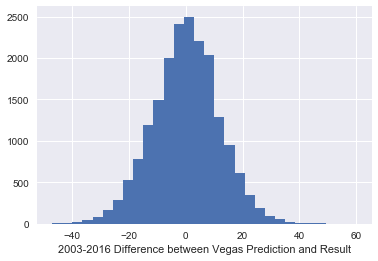

In [93]:
plt.hist(diff['difference'],bins=30)
plt.xlabel('2003-2016 Difference between Vegas Prediction and Result')

In [94]:
diff['difference'].describe()

count    19332.000000
mean         0.127354
std         11.747539
min        -47.000000
25%         -7.500000
50%         -0.000000
75%          7.500000
max         60.000000
Name: difference, dtype: float64

In [117]:
def bet_home(row):
    return row['result']<=row['vegas_closer_away']

In [145]:
data['bet_on_home_close'] = data.apply(bet_home,axis=1)

In [146]:
data = data[data['result']!=data['vegas_closer_away']]

Below is the percentage of the time that the home team won.

In [147]:
data['bet_on_home_close'].mean()

0.50385038503850388

In [234]:
features = ['3P_home', '3P%_home', '3PA_home','DRB%_home', 'EFG%_home',
       'FT_factor_home', 'ORB%_home', 'PPG_home', 'TOV%_home','3P_away', '3P%_away', '3PA_away', 'DRB%_away', 'EFG%_away',
       'FT_factor_away', 'ORB%_away', 'PPG_away', 'TOV%_away']
label = 'bet_on_home_close'
print features

['3P_home', '3P%_home', '3PA_home', 'DRB%_home', 'EFG%_home', 'FT_factor_home', 'ORB%_home', 'PPG_home', 'TOV%_home', '3P_away', '3P%_away', '3PA_away', 'DRB%_away', 'EFG%_away', 'FT_factor_away', 'ORB%_away', 'PPG_away', 'TOV%_away']


In [235]:
##all of the models I will try out
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso,Ridge,LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC

In [236]:
X=data[features]
y = data[label]

In [237]:
#make sure to scale the features so that they all have the same mean and standard deviation.
#This is necessary for a model like K Nearest Neighbors

ss= StandardScaler()
scaled_x = ss.fit_transform(X)

In [239]:
scores = []
for i in range(20):
    model = LogisticRegression()
    params = {
        'C':np.logspace(-3,3,100),
        'penalty':['l1','l2'],
        'fit_intercept':[False,True]
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(scaled_x,y)
    scores.append(rs.best_score_)
np.array(scores).mean()

0.50253025302530263

In [240]:
scores = []
for i in range(20):
    model = DecisionTreeClassifier()
    params = {
        'criterion':['gini','entropy'],
        'max_features':[3,4,5,6,7,8],
        'max_depth':[4,5,6,7,8,9],
        'min_samples_split':[4,5,6,7,8,9,10,11,12],
        'min_samples_leaf':[3,4,5,6,7,8]
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(scaled_x,y)
    scores.append(rs.best_score_)
np.array(scores).mean()

0.51650165016501659

In [176]:
scores = []
for i in range(20):
    model = KNeighborsClassifier()
    params = {
        'n_neighbors':range(5,40),
        'weights':['uniform','distance'],
        'algorithm':['auto','ball_tree','kd_tree'],
        'metric':['minkowski','manhattan','euclidean']
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(scaled_x,y)
    scores.append(rs.best_score_)
np.array(scores).mean()

0.5036303630363036

In [243]:

model = RandomForestClassifier()
params = {
    'n_estimators':[90,100,150,200,300],
    'criterion':['gini','entropy'],
    'max_features':['auto','log2',3,4,7,6],
    'max_depth':[4,5,6,7],
    'min_samples_split':[3,4,5]
}
rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
rs.fit(X_pca,y)
rs.best_score_



0.52035203520352036

In [244]:
rs.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 3,
 'min_samples_split': 4,
 'n_estimators': 300}

In [196]:
scores = []
for i in range(10):
    model = SVC()
    params = {
        'C':[.1,.5,1,1.3,2,4,7],
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':[1,2,3,4]
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(scaled_x,y)
    scores.append(rs.best_score_)
np.array(scores).mean()


0.51903190319031911

In [214]:
scores = []
for i in range(10):
    model = DecisionTreeClassifier()
    params = {
        'criterion':['gini','entropy'],
        'max_features':[3,4,5,6,7,8],
        'max_depth':[4,5,6,7,8,9],
        'min_samples_split':[4,5,6,7,8,9,10,11,12],
        'min_samples_leaf':[3,4,5,6,7,8]
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(scaled_x,y)
    scores.append(rs.best_score_)
np.array(scores).mean()

0.52101210121012098

In [197]:
rs.best_params_

{'C': 1, 'degree': 1, 'kernel': 'poly'}

In [185]:
data.columns.values

array(['3P_home', '3P%_home', '3PA_home', 'DRB%_home', 'EFG%_home',
       'FT_factor_home', 'ORB%_home', 'PPG_home', 'TOV%_home', 'game_Id',
       'opp_3P_home', 'opp_3P%_home', 'opp_3PA_home', 'opp_DRB%_home',
       'opp_EFG%_home', 'opp_FT_factor_home', 'opp_ORB%_home',
       'opp_PPG_home', 'opp_TOV%_home', 'team_home', 'win_percent_home',
       'line_id_home', 'Days_Since_home', 'team_location_home',
       'team_time_zone_home', 'last_loc_home',
       'distance_From_Last_Game_home', 'last_time_zone_home',
       'time_zone_diff_From_last_home', 'played_last_night_home',
       'played_road_last_night_home', 'played_diff_loc_last_night_home',
       '3P_away', '3P%_away', '3PA_away', 'DRB%_away', 'EFG%_away',
       'FT_factor_away', 'ORB%_away', 'PPG_away', 'TOV%_away',
       'bet_on_home_close', 'bet_on_home_open', 'opp_3P_away',
       'opp_3P%_away', 'opp_3PA_away', 'opp_DRB%_away', 'opp_EFG%_away',
       'opp_FT_factor_away', 'opp_ORB%_away', 'opp_PPG_away',
       'op

In [191]:
features = ['3P_home', '3P%_home', '3PA_home', 'DRB%_home', 'EFG%_home',
       'FT_factor_home', 'ORB%_home', 'PPG_home', 'TOV%_home','opp_3P_home', 'opp_3P%_home', 'opp_3PA_home', 'opp_DRB%_home',
       'opp_EFG%_home', 'opp_FT_factor_home', 'opp_ORB%_home',
       'opp_PPG_home', 'opp_TOV%_home', 'win_percent_home','Days_Since_home','played_road_last_night_home', 'played_diff_loc_last_night_home',
        '3P_away', '3P%_away', '3PA_away', 'DRB%_away', 'EFG%_away',
       'FT_factor_away', 'ORB%_away', 'PPG_away', 'TOV%_away','opp_3P_away',
       'opp_3P%_away', 'opp_3PA_away', 'opp_DRB%_away', 'opp_EFG%_away',
       'opp_FT_factor_away', 'opp_ORB%_away', 'opp_PPG_away',
       'opp_TOV%_away','win_percent_away','Days_Since_away','distance_From_Last_Game_home','played_road_last_night_away',
       'played_diff_loc_last_night_away']
label = 'bet_on_home_close'

In [192]:
scaled_features = ss.fit_transform(data[features])

In [198]:
from sklearn.decomposition import PCA

In [208]:
pca = PCA(n_components=25)

In [209]:
X_pca = pca.fit_transform(scaled_features)

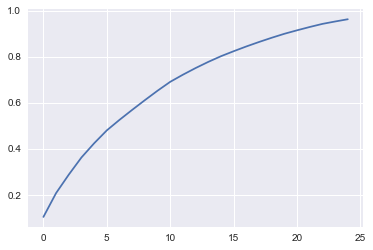

In [210]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [229]:
scores = []
for i in range(10):
    model = SVC()
    params = {
        'C':[.1,.5,1,1.3,2,4,7],
        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        'degree':[1,2,3,4]
    }
    rs = RandomizedSearchCV(model,cv=6,param_distributions=params)
    rs.fit(X_pca,y)
    scores.append(rs.best_score_)
np.array(scores).mean()

0.519031903190319

Isolating certain features to see if any one statistic is a good predictor for which side of the line to bet 

In [221]:
data[(data['EFG%_home']>data['EFG%_away'])]['bet_on_home_close'].mean()

0.5011037527593819

In [222]:
data[(data['DRB%_home']>data['DRB%_away'])]['bet_on_home_close'].mean()

0.50657894736842102

In [223]:
data[(data['win_percent_home']>data['win_percent_away'])]['bet_on_home_close'].mean()

0.49099099099099097

In [224]:
data[(data['FT_factor_home']>data['FT_factor_away'])]['bet_on_home_close'].mean()

0.48478260869565215

In [225]:
data[(data['3PA_home']>data['3PA_away'])]['bet_on_home_close'].mean()

0.52000000000000002

In [226]:
data[(data['3P_home']>data['3P_away'])]['bet_on_home_close'].mean()

0.4988962472406181

In [228]:
data[(data['3P%_home']>data['3P%_away'])]['bet_on_home_close'].mean()

0.49892473118279568

What about just betting the favorite?

In [255]:
import math

In [259]:
def fav_win(row):
    if row['result']<0 and row['vegas_closer_away']>=0:
        return 0
    elif row['result']>0 and row['vegas_closer_away']<=0:
        return 0
    else:
        return math.fabs(row['result'])>math.fabs(row['vegas_closer_away'])

In [260]:
x= data[['result','vegas_closer_away']]
x['fav'] = x.apply(fav_win,axis=1)

/Users/andrewadelson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


It appears in the 2016-2017 NBA Season if you predicted the underdog to beat the line, then you would be correct 52.3% of the time, just often enough to come close to break even given the Vegas vig

In [262]:
x['fav'].mean()

0.47634763476347636